**Task 1 (10 points): Describe a machine learning problem that you would like to solve using
Logistic Regression. Clearly state why Logistic regression is the best choice for solving this
problem.**

The machine learning problem I would like to solve involves predicting student performance in the third period based on a few selected factors and their grades in the first two periods. Specifically, the goal is to predict whether a student's grade in the third period will be greater than or less than 10 on a scale of 20. Logistic regression is an ideal choice for this problem for several reasons. Logistic regression is designed for binary outcomes, which in my case is whether the third period grade is greater than or less than 10. This would make it a suitable model for my prediction task. Additionally, this would help with interpretability, and would be using easier to understand coefficients that would clearly show how different factors affect a student's test scores.

**Task 2 (20 points): Pick a publicly available dataset (except The Titanic Dataset) that you will
use to solve this problem. You must provide a link to the dataset and perform the necessary
Exploratory Data Analysis (EDA). Clearly demonstrate the steps you follow for your EDA with a
justification of why these were required. For example, if the dataset has lot of missing values,
then why did you use a specific technique when handling missing data. This task may include
data visualization (Check this link : https://www.geeksforgeeks.org/top-8-python-libraries-fordata-visualization/ ).**

Here is the link to the dataset I will be using.
https://archive.ics.uci.edu/dataset/320/student+performance 
Although I had access to the data for both the math and Portuguese language class score, but for this problem I just wanted to focus on the scores for the mathematics exams. 

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# The first step in performing an EDA is to first import the necessary libraries

file_path = 'student-mat.csv'  # Replace with your file path
data = pd.read_csv(file_path, delimiter=';')

# I then loaded the data to understand what exactly I was working with

data.head()
data.info()


print(data)

# I wanted to present the data in a table format



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

Here is the description of what each variable means

**Variables Table**

|Variable Name | Description                                                                      |
|--------------|----------------------------------------------------------------------------------|
|school        | student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) |
|sex	       | student's sex (binary: 'F' - female or 'M' - male)                               | 
|age           | student's age (numeric: from 15 to 22)                                           |
|address       | student's home address type (binary: 'U' - urban or 'R' - rural)                 |
|famsize       | family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)       |
|Pstatus       | parent's cohabitation status (binary: 'T' - living together or 'A' - apart)      |
|Medu          | mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)           |
|Fedu	       | father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)     |
|Mjob	       | mother's job (nominal: 'teacher', 'health' care related, civil 'services'(e.g. administrative or police), 'at_home' or 'other') |	                          |
|Fjob	       | father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')	|
| reason | reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')	|
| guardian | student's guardian (nominal: 'mother', 'father' or 'other')	|
| traveltime | home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)	|
| studytime	| weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) |
| failures	| number of past class failures (numeric: n if 1<=n<3, else 4) |
| schoolsup	| extra educational support (binary: yes or no)	|
| famsup |family educational support (binary: yes or no) | 
| paid | extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) |
| activities | extra-curricular activities (binary: yes or no)	|
|nursery | attended nursery school (binary: yes or no)	|
| higher | wants to take higher education (binary: yes or no) |
| internet | Internet access at home (binary: yes or no) |
| romantic | with a romantic relationship (binary: yes or no) |
| famrel | quality of family relationships (numeric: from 1 - very bad to 5 - excellent)|
| freetime | free time after school (numeric: from 1 - very low to 5 - very high) |
| goout | going out with friends (numeric: from 1 - very low to 5 - very high) |
| Dalc	| workday alcohol consumption (numeric: from 1 - very low to 5 - very high)	|
| Walc	| weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) |
| health | current health status (numeric: from 1 - very bad to 5 - very good) |
| absences | number of school absences (numeric: from 0 to 93) |
| G1 | first period grade (numeric: from 0 to 20) |
| G2 | second period grade (numeric: from 0 to 20) |
| G3 | final grade (numeric: from 0 to 20, output target) |
	                

In [21]:
# what's the data size?
data.shape

(395, 33)

In [22]:
# general information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [23]:

# statistics of the dataset (numeric columns)
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [24]:
# statistics of the dataset (categorical columns)
data.describe(include=['O'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395,395
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,yes,yes,yes,yes,no
freq,349,208,307,281,354,141,217,145,273,344,242,214,201,314,375,329,263


C:\Users\ajayn\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


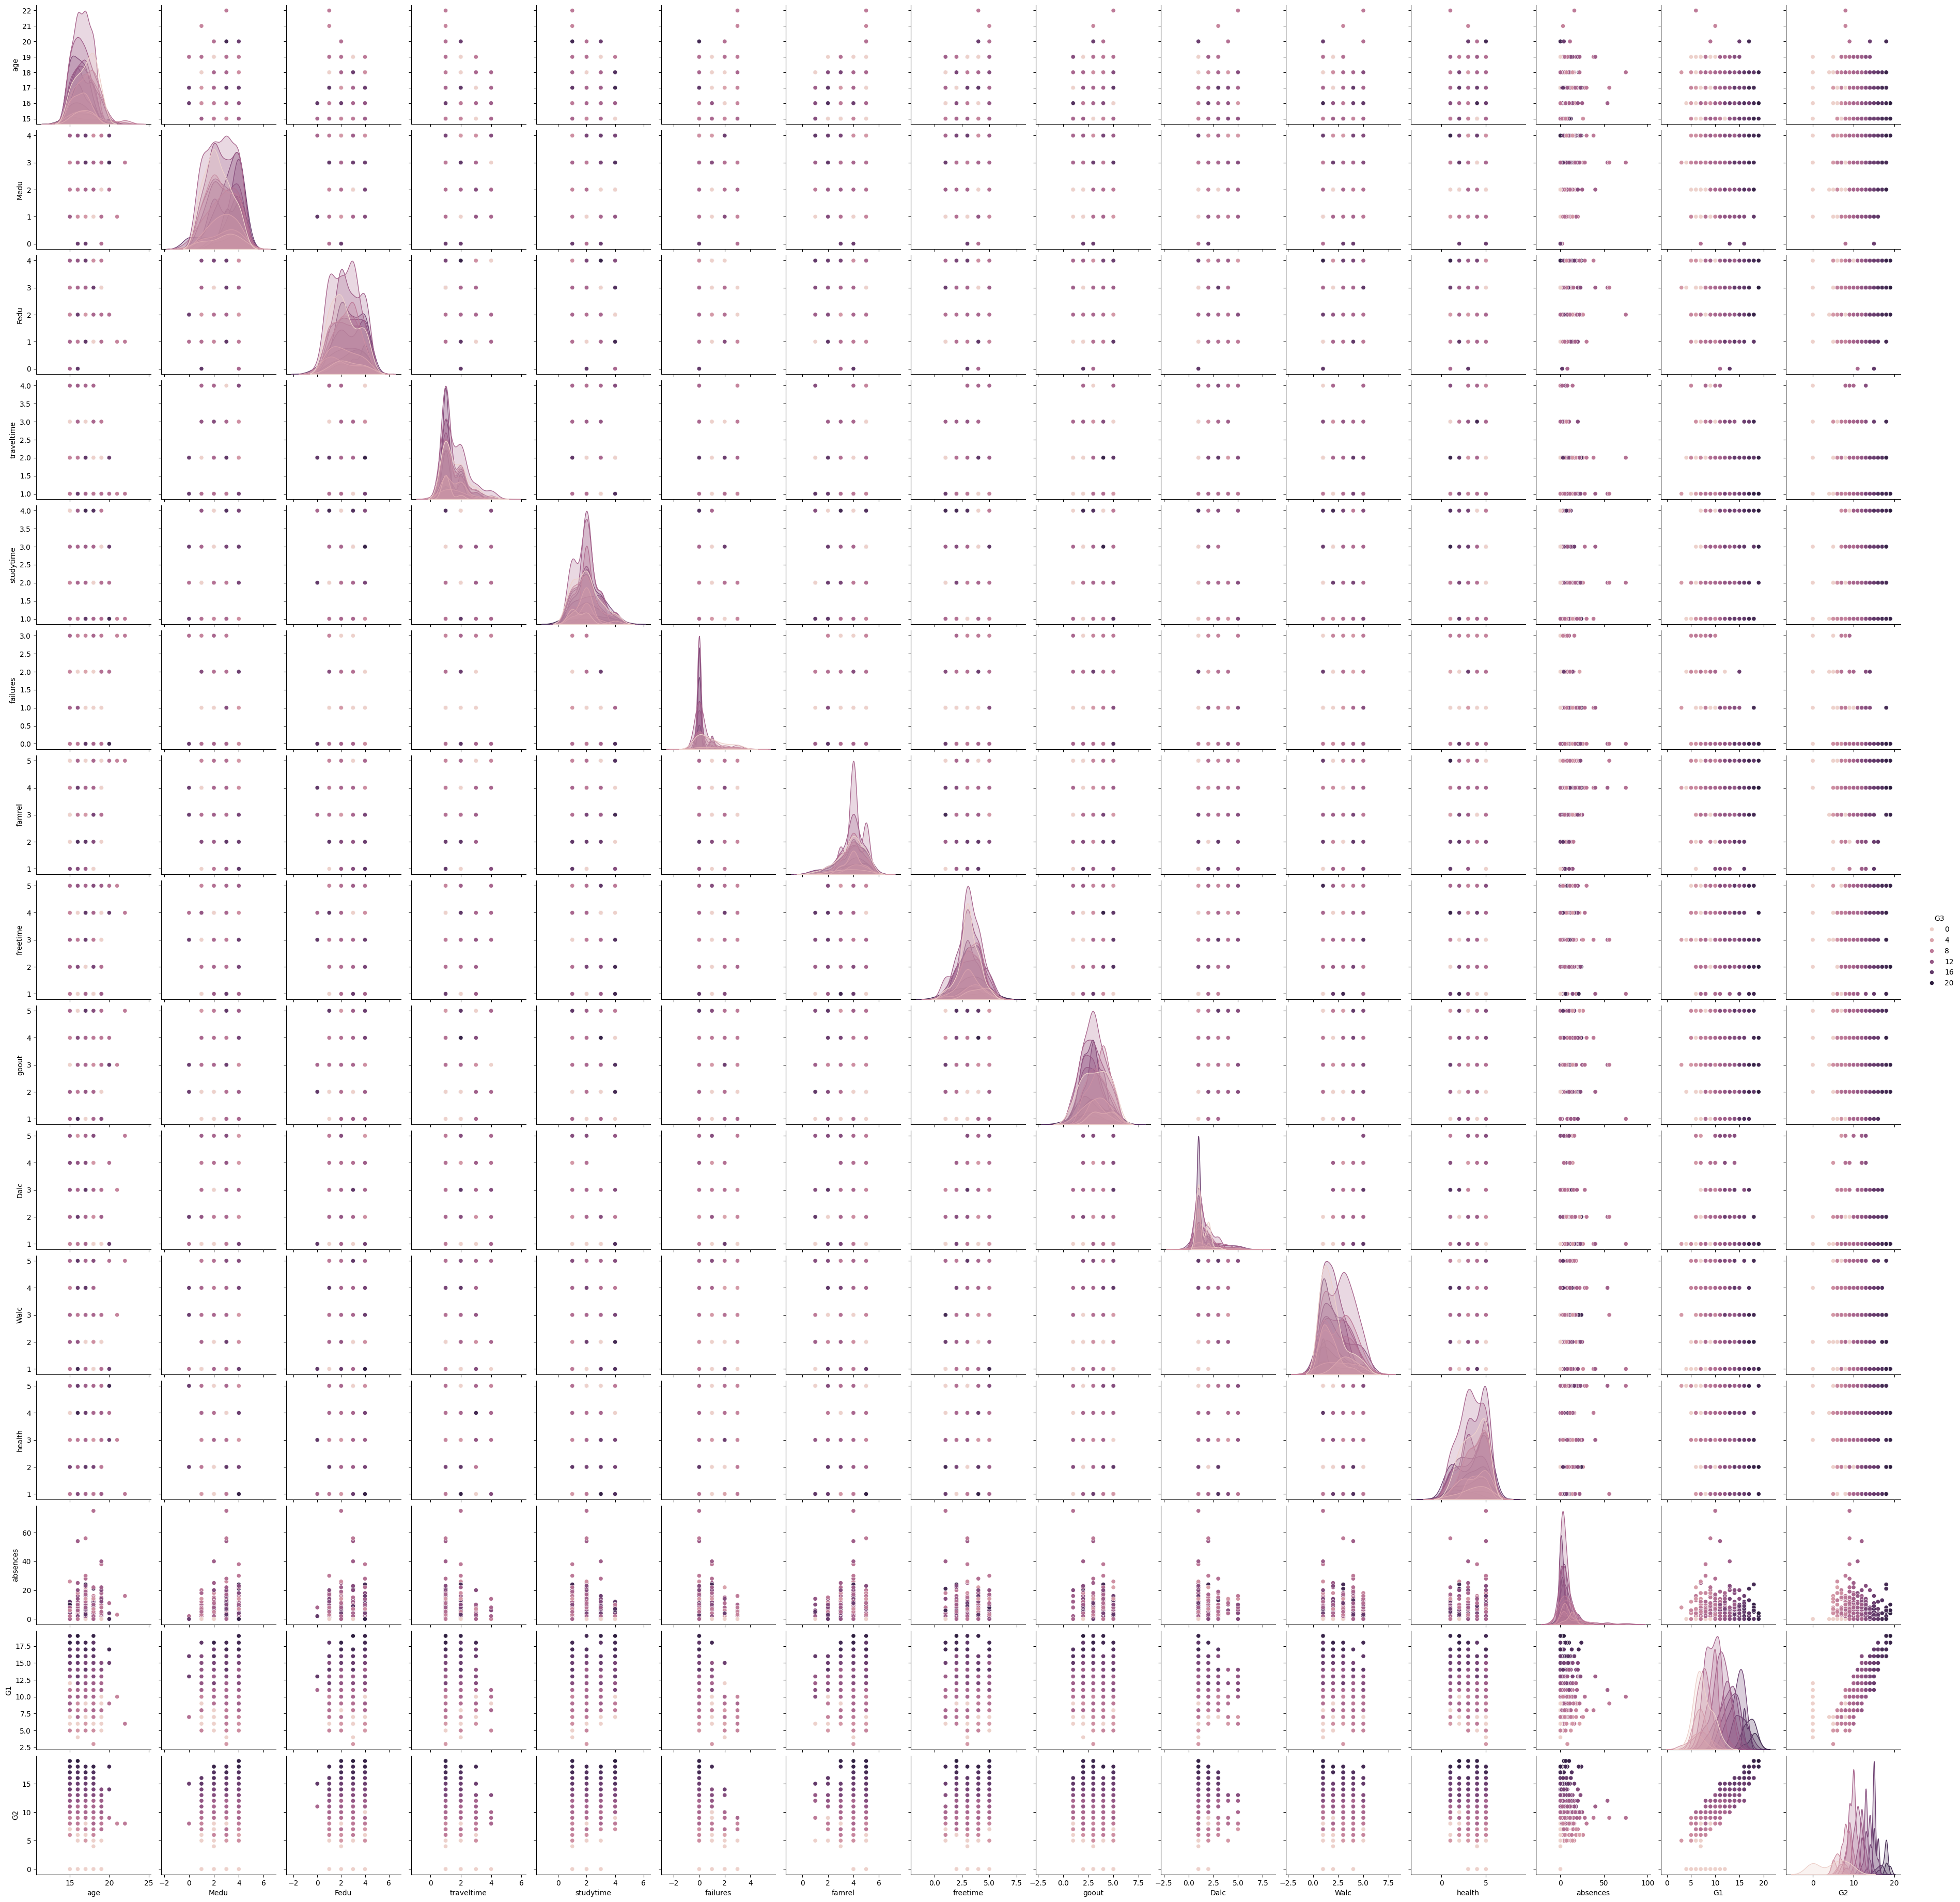

In [25]:
# ploting pairwise relationships in the dataset
sns.pairplot(data, hue='G3')


C:\Users\ajayn\AppData\Local\Temp\ipykernel_11984\1034218920.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


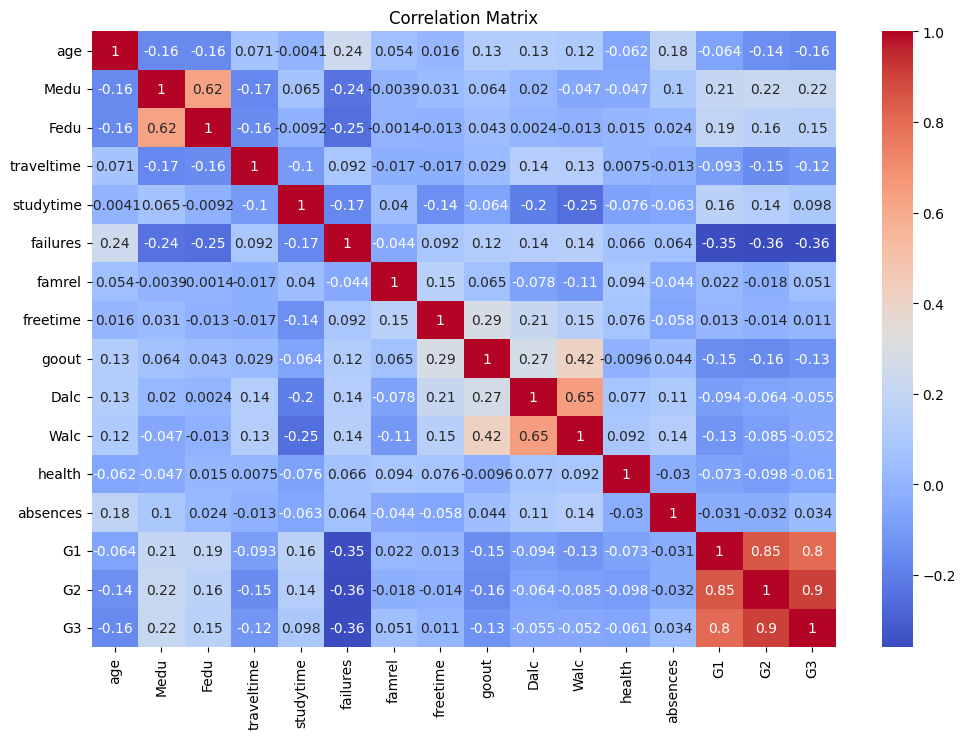

In [26]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# I wanted to utilize a correlation matrix to be able to see what values were related to each other, so I could use this information later 
# for a further analysis

Most students in the dataset are between 15 and 18 years old, which aligns with the typical age range for secondary education. There is a strong correlation between the grades in different periods (G1, G2, and G3), suggesting consistency in student performance across the academic year. There is a negative correlation between the number of failures and the final grade, indicating that students who have failed more subjects tend to score lower in their final grade. The final grades (G3) have a left-skewed distribution. A notable number of students have a grade of 0, which could indicate either failure, dropping out, or missing examinations.

Overall, we are able to see some correlation between the different factors and the test scores. Students with parents who have higher levels of education might perform better academically. The dataset provides the education level of both mothers (Medu) and fathers (Fedu), which can be correlated with the students' grades. There is likely a relationship between the amount of time students spend studying and their academic performance. Students who spend more time studying might have higher grades. The number of absences from school might have a negative correlation with grades. Students who miss more classes may have lower test scores due to missed learning opportunities.

**Task 3 (25 points): Implement, Logistic Regression in this step. Clearly write your cost function
and derivatives before implementing gradient descent. Do not use any built-in packages for this
step. You can use the vectorization techniques demonstrated in class. Implement any 2 variants
of gradient descent in their original form. (Refer to the research paper discussed in class).**

In [48]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'student-mat.csv'
d1 = pd.read_csv(file_path, delimiter=';')

# Select features and target variable 
features = d1[['age', 'Medu', 'Fedu', 'studytime', 'failures', 'activities', 'higher', 'internet', 'romantic', 'famrel', 'goout', 'Walc', 'health', 'absences', 'G1', 'G2']]  # Select relevant features
target = d1['G3']            # Select the target variable

# Convert target to binary (example: 0 if G3 < 10, else 1)
target_binary = (target >= 10).astype(int)

# Initialize parameters
theta = np.zeros(features.shape[1])  # Ensure theta is a numpy array with correct length


# Convert to numpy arrays
X = features.values
y = target_binary.values




For this section I started by utilizing the diagrams above to pick certain features to make my logistic regression model. These were chosen based on whether they seemed to have an impact on the final test score. I also converted the G3 in my training data to be binary, so 0 if it was less than 10, and then 1 for anything 10 or above. 

In [38]:
# Add an intercept term to X
X_intercept = np.hstack([np.ones((X.shape[0], 1)), X])  # Add a column of ones
theta = np.zeros(X_intercept.shape[1])  # Initialize theta including the intercept term

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_cost(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    cost = -(1/m) * np.sum(y * np.log(predictions) + (1 - y) * np.log(1 - predictions))
    return cost

def compute_gradients(X, y, theta):
    m = len(y)
    predictions = sigmoid(np.dot(X, theta))
    gradients = np.dot(X.T, (predictions - y)) / m
    return gradients


In [31]:
def batch_gradient_descent(X, y, theta, alpha, num_iterations):
    cost_history = []

    for i in range(num_iterations):
        gradients = compute_gradients(X, y, theta)
        theta -= alpha * gradients
        cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


In [32]:
def stochastic_gradient_descent(X, y, theta, alpha, num_iterations):
    m = len(y)
    cost_history = []

    for i in range(num_iterations):
        for j in range(m):
            idx = np.random.randint(m)
            xi = X[idx:idx+1]
            yi = y[idx:idx+1]
            gradients = compute_gradients(xi, yi, theta)
            theta -= alpha * gradients
            cost_history.append(compute_cost(X, y, theta))

    return theta, cost_history


In [52]:
# Initialize parameters
theta = np.zeros(X.shape[1])
alpha = 0.01
num_iterations = 1000

# Train the model using Batch Gradient Descent
print(type(X))
print(type(theta))
theta_bgd, cost_history_bgd = batch_gradient_descent(X, y, theta, alpha, num_iterations)

# Train the model using Stochastic Gradient Descent
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X, y, theta, alpha, num_iterations)


<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


TypeError: can't multiply sequence by non-int of type 'float'